
## Pandas
- **DataFrame Handling**: Pandas allows for the creation and manipulation of tabular data structures (DataFrames), which are ideal for working with datasets like `dirty_dataset` and `duplicated_rows`.
- **Data Cleaning**: It provides methods to handle missing values, duplicate records, and inconsistent data, as seen in the various steps of cleaning the `dirty_dataset`.
- **File I/O**: Pandas makes it easy to read and write data from files, such as the CSV file loaded into `dirty_dataset`.
- **Data Analysis**: It offers functions for filtering, grouping, and summarizing data, which are essential for analyzing datasets.

## NumPy
- **Efficient Arrays**: NumPy arrays (`numpy.ndarray`) are used for handling numerical data efficiently, such as `sale price`, `gross sales`, and `units sold`.
- **Integration with Pandas**: NumPy arrays integrate seamlessly with Pandas, allowing for efficient manipulation of numerical data within DataFrames.


In [1]:
import pandas as pd
import numpy as np

Duplicating the sales_N_ratings dataset to ‘dirty it up’.

In [ ]:
dataset = pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Datasets\\Datasets\\5_sales_N_ratings\\Books_Data_Clean.csv')
dataset_copy = dataset.copy()

dataset_copy.to_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Clean_copy.csv', index=False)

## Inserting errors into the dataset

In [ ]:
dirty_dataset = pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Clean_copy.csv')

# Merging Book Name and Author with a double space

dirty_dataset["Book Name"] = (
    dirty_dataset["Book Name"].fillna("") 
    + "  " 
    + dirty_dataset["Author"].fillna("")
)
dirty_dataset.drop(columns=["Author"], inplace=True)
dirty_dataset[["Book Name"]].head()


,Book Name
0,"Beowulf Unknown, Seamus Heaney"
1,"Batman: Year One Frank Miller, David Mazzucch..."
2,Go Set a Watchman Harper Lee
3,When You Are Engulfed in Flames David Sedaris
4,Daughter of Smoke & Bone Laini Taylor


All fused and messed up...

In [ ]:
# Enter missing values
dirty_dataset.loc[10:20, 'sale price'] = np.nan
dirty_dataset.loc[30:40, 'units sold'] = np.nan
dirty_dataset.loc[50:60, 'Author'] = np.nan

In [ ]:
# Duplicate entities
duplicated_rows = dirty_dataset[60:70].copy()
dirty_dataset = pd.concat([dirty_dataset, duplicated_rows], ignore_index=True)

In [ ]:
# Negative prices 
real_prices = dirty_dataset['sale price'].dropna().sample(11, random_state=1).values
dirty_dataset.loc[70:80, 'sale price'] = -np.abs(real_prices)

In [ ]:
# Negative or zero units sold
real_units = dirty_dataset['units sold'].dropna().sample(11, random_state=2).astype(int).values
dirty_dataset.loc[90:100, 'units sold'] = [-abs(u) if i % 2 == 0 else 0 for i, u in enumerate(real_units)]
invalid_units = dirty_dataset['units sold'].dropna().sample(11, random_state=5).astype(int).values
dirty_dataset.loc[150:160, 'units sold'] = [-abs(u) if i % 2 == 0 else 0 for i, u in enumerate(invalid_units)]

In [ ]:
# Negative values for gross sales and publisher revenue
gross_sales_sample = dirty_dataset['gross sales'].dropna().sample(11, random_state=20).values
publisher_revenue_sample = dirty_dataset['publisher revenue'].dropna().sample(11, random_state=21).values

dirty_dataset.loc[300:310, 'gross sales'] = -np.abs(gross_sales_sample)
dirty_dataset.loc[311:321, 'publisher revenue'] = -np.abs(publisher_revenue_sample)


In [ ]:
# Dates with inconsistent formats
dirty_dataset['Publishing Year'] = dirty_dataset['Publishing Year'].astype(str)
years = dirty_dataset['Publishing Year'].dropna().astype(float).sample(11, random_state=3).astype(str).values
dirty_dataset.loc[110:120, 'Publishing Year'] = [
    f"{y}-12-15" if i % 3 == 0 else f"15/12/{y}" if i % 3 == 1 else f"December 15, {y}"
    for i, y in enumerate(years)
]

In [ ]:

# Capitalisation errors and spaces
titles = dirty_dataset['Book Name'].dropna().sample(11, random_state=4).values
dirty_dataset.loc[130:140, 'Book Name'] = [
    f" {t.lower()} " if i % 2 == 0 else f"{t.upper()}" for i, t in enumerate(titles)
]

In [ ]:

# Inconsistent capitalisation
authors = dirty_dataset['Author'].dropna().unique()
selected_authors = pd.Series(authors).sample(11, random_state=6).values
dirty_dataset.loc[170:180, 'Author'] = [
    a.lower() if i % 3 == 0 else a.upper() if i % 3 == 1 else a.title()
    for i, a in enumerate(selected_authors)
]

In [ ]:
# Duplicate entries
dirty_dataset.loc[190:200, 'index'] = [1] * 11

In [ ]:
# Prices with text
dirty_dataset['sale price'] = dirty_dataset['sale price'].astype(str)
real_text_prices = dirty_dataset['sale price'].dropna().sample(11, random_state=7).round(2).astype(str).values
dirty_dataset.loc[210:220, 'sale price'] = [
    f"USD {p}" if i % 3 == 0 else f"${p}" if i % 3 == 1 else f"Price: {p}"
    for i, p in enumerate(real_text_prices)
]

In [ ]:

# Titles with formatting errors
more_titles = dirty_dataset['Book Name'].dropna().sample(11, random_state=8).values
dirty_dataset.loc[230:240, 'Book Name'] = [
    f"{t.lower()}  " if i % 2 == 0 else f"  {t.upper()}" for i, t in enumerate(more_titles)
]

In [ ]:
# Ratings out of range [0, 5]
book_rating_numeric = pd.to_numeric(dirty_dataset['Book_average_rating'], errors='coerce').dropna()

if len(book_rating_numeric) >= 6:
    book_rating_sample = book_rating_numeric.sample(6, random_state=22).values
    dirty_dataset.loc[322:327, 'Book_average_rating'] = [
        v + 5 if i % 2 == 0 else -abs(v) for i, v in enumerate(book_rating_sample)
    ]


In [ ]:
# Non-numeric text in numeric columns
sale_price_sample = dirty_dataset['sale price'].dropna().sample(4, random_state=24).round(2).astype(str).values
gross_sales_text_sample = dirty_dataset['gross sales'].dropna().sample(4, random_state=25).astype(str).values
publisher_revenue_text_sample = dirty_dataset['publisher revenue'].dropna().sample(4, random_state=26).astype(str).values
units_sold_text_sample = dirty_dataset['units sold'].dropna().sample(4, random_state=27).astype(str).values

dirty_dataset['sale price'] = dirty_dataset['sale price'].astype('object')
dirty_dataset['gross sales'] = dirty_dataset['gross sales'].astype('object')
dirty_dataset['publisher revenue'] = dirty_dataset['publisher revenue'].astype('object')
dirty_dataset['units sold'] = dirty_dataset['units sold'].astype('object')

dirty_dataset.loc[333:336, 'sale price'] = [
    f"USD {sale_price_sample[0]}", f"Price: {sale_price_sample[1]}",
    f"${sale_price_sample[2]}", f"{sale_price_sample[3]} dollars"
]

dirty_dataset.loc[337:340, 'gross sales'] = [
    f"Revenue: {gross_sales_text_sample[0]}", f"USD {gross_sales_text_sample[1]}",
    f"${gross_sales_text_sample[2]}", f"{gross_sales_text_sample[3]} gross"
]

dirty_dataset.loc[341:344, 'publisher revenue'] = [
    f"Profit: {publisher_revenue_text_sample[0]}", f"USD {publisher_revenue_text_sample[1]}",
    f"${publisher_revenue_text_sample[2]}", f"{publisher_revenue_text_sample[3]} total"
]

dirty_dataset.loc[345:348, 'units sold'] = [
    f"{units_sold_text_sample[0]} units", f"{units_sold_text_sample[1]} copies",
    f"Units: {units_sold_text_sample[2]}", f"Sold: {units_sold_text_sample[3]}"
]

dirty_dataset.to_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Dirty.csv', index=False)

---

Before doing any Data Profiling we should solve the problem with the fused columns to understand the errors that are in the dataset.

In [ ]:
dirty_dataset = pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Dirty.csv')

split = dirty_dataset["Book Name"].str.split("  ", n=1, expand=True)

dirty_dataset["Book Name"] = split[0]
dirty_dataset["Author"]    = split[1]

dirty_dataset[["Book Name", "Author"]].head()

,Book Name,Author
0,Beowulf,"Unknown, Seamus Heaney"
1,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew..."
2,Go Set a Watchman,Harper Lee
3,When You Are Engulfed in Flames,David Sedaris
4,Daughter of Smoke & Bone,Laini Taylor


Seems to have worked...

---

## Data Profiling

In [1]:
import numpy as np
import pandas as pd
dirty_dataset = pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Dirty.csv')
dirty_dataset.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000.0
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250.0
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500.0
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.5,3,Hachette Book Group,5500.0
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750.0


In [ ]:
# Type of Data
dtypes_df = dirty_dataset.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Data type']
dtypes_df

,Column,Data type
0,index,int64
1,Publishing Year,object
2,Book Name,object
3,Author,object
4,language_code,object
5,Author_Rating,object
6,Book_average_rating,float64
7,Book_ratings_count,int64
8,genre,object
9,gross sales,object


In [ ]:
# Missing Values
missing_df = dirty_dataset.isnull().sum().reset_index()
missing_df.columns = ['Column', 'Missing Values']
missing_df['Missing %'] = (missing_df['Missing Values'] / len(dirty_dataset)) * 100
missing_df


,Column,Missing Values,Missing %
0,index,0,0.000000
1,Publishing Year,1,0.092593
2,Book Name,23,2.129630
3,Author,12,1.111111
4,language_code,53,4.907407
5,Author_Rating,0,0.000000
6,Book_average_rating,0,0.000000
7,Book_ratings_count,0,0.000000
8,genre,0,0.000000
9,gross sales,0,0.000000


In [ ]:
# Duplicates
duplicados_total = dirty_dataset.duplicated().sum()
print(f"Total duplicate records (complete lines): {duplicados_total}")

Total duplicate records (complete lines): 10


In [ ]:
# Some interesting statistics...
descricao_df = dirty_dataset.describe(include='all').transpose().reset_index()
descricao_df.rename(columns={'index': 'Column'}, inplace=True)
descricao_df

,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,index,1080.0,NaN,NaN,NaN,528.172222,313.60196,0.0,259.75,529.5,799.25,1069.0
1,Publishing Year,1079,159,2012.0,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Book Name,1057,1045,The Rainmaker,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Author,1068,726,Stephen King,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,language_code,1027,8,eng,745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Author_Rating,1080,4,Intermediate,635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Book_average_rating,1080.0,NaN,NaN,NaN,3.998519,0.556835,-4.22,3.85,4.015,4.17,9.34
7,Book_ratings_count,1080.0,NaN,NaN,NaN,95411.456481,31819.964672,27308.0,70526.0,89651.0,115679.5,206792.0
8,genre,1080,4,genre fiction,832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,gross sales,1080,832,117.81,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Negative Values
dirty_dataset['sale price'] = pd.to_numeric(dirty_dataset['sale price'], errors='coerce')
dirty_dataset['units sold'] = pd.to_numeric(dirty_dataset['units sold'], errors='coerce')
dirty_dataset['gross sales'] = pd.to_numeric(dirty_dataset['gross sales'], errors='coerce')
dirty_dataset['publisher revenue'] = pd.to_numeric(dirty_dataset['publisher revenue'], errors='coerce')

negativos_df = pd.DataFrame({
    'Column': [
        'sale price',
        'units sold',
        'gross sales',
        'publisher revenue'
    ],
    'Negative Values': [
        (dirty_dataset['sale price'] < 0).sum(),
        (dirty_dataset['units sold'] < 0).sum(),
        (dirty_dataset['gross sales'] < 0).sum(),
        (dirty_dataset['publisher revenue'] < 0).sum()
    ]
})

negativos_df

,Column,Negative Values
0,sale price,11
1,units sold,12
2,gross sales,11
3,publisher revenue,7


In [ ]:

# Check intervals [0, 5]
dirty_dataset['Book_average_rating'] = pd.to_numeric(dirty_dataset['Book_average_rating'], errors='coerce')

out_of_bounds_df = pd.DataFrame({
    'Column': ['Book_average_rating'],
    'Values Outside the Range': [
        ((dirty_dataset['Book_average_rating'] < 0) | (dirty_dataset['Book_average_rating'] > 5)).sum()
    ]
})

out_of_bounds_df

,Column,Values Outside the Range
0,Book_average_rating,6


In [ ]:
# Non-numericals in numericals columns
colunas_a_verificar = ['sale price', 'gross sales', 'publisher revenue', 'units sold']

def contar_nao_numericos(serie):
    return pd.to_numeric(serie, errors='coerce').isna().sum()

non_numeric_results = {
    'Column': [],
    'Non-numericals': []
}

for coluna in colunas_a_verificar:
    if coluna in dirty_dataset.columns:
        count = contar_nao_numericos(dirty_dataset[coluna])
        non_numeric_results['Column'].append(coluna)
        non_numeric_results['Non-numericals'].append(count)

non_numeric_df = pd.DataFrame(non_numeric_results)
non_numeric_df

,Column,Non-numericals
0,sale price,26
1,gross sales,4
2,publisher revenue,4
3,units sold,15


In [ ]:
#Uniqueness of each column
print("\nUniqueness os each column:")
for coluna in dirty_dataset .columns:
    unique_count = dirty_dataset [coluna].nunique()
    print(f"'{coluna}': {unique_count} unique values ({len(dirty_dataset )} total)")



Uniqueness os each column:
'index': 1059 unique values (1080 total)
'Publishing Year': 159 unique values (1080 total)
'Book Name': 1045 unique values (1080 total)
'Author': 726 unique values (1080 total)
'language_code': 8 unique values (1080 total)
'Author_Rating': 4 unique values (1080 total)
'Book_average_rating': 140 unique values (1080 total)
'Book_ratings_count': 1064 unique values (1080 total)
'genre': 4 unique values (1080 total)
'gross sales': 828 unique values (1080 total)
'publisher revenue': 609 unique values (1080 total)
'sale price': 150 unique values (1080 total)
'sales rank': 865 unique values (1080 total)
'Publisher ': 9 unique values (1080 total)
'units sold': 476 unique values (1080 total)


This table is useful because it shows that columns such as **'Author_Rating'** , **'genre'** and **'language_code'** already have standard values, which means that their values themselves don't need deep cleaning.

### A little more in-depth data profiling...

In [ ]:
#The values of 'Author_Rating'
print("Values in 'Author_Rating':")
print(dirty_dataset['Author_Rating'].unique())

Values in 'Author_Rating':
['Novice' 'Intermediate' 'Famous' 'Excellent']


In [ ]:
#The values of 'genre'
print("Values in 'genre':")
print(dirty_dataset['genre'].unique())

Values in 'genre':
['genre fiction' 'fiction' 'nonfiction' 'children']


In [ ]:
#The values of 'language_code'
print("Values in 'language_code':")
print(dirty_dataset['language_code'].unique())

Values in 'language_code':
['en-US' 'eng' nan 'spa' 'en-GB' 'fre' 'en-CA' 'nl' 'ara']


In [ ]:
#The values of 'Publisher'
print("Values in 'Publisher':")
print(dirty_dataset['Publisher '].unique())

Values in 'Publisher':
['HarperCollins Publishers' 'Amazon Digital Services,  Inc.'
 'Hachette Book Group' 'Penguin Group (USA) LLC' 'Random House LLC'
 'Simon and Schuster Digital Sales Inc' 'Macmillan'
 'HarperCollins Publishing' 'HarperCollins Christian Publishing']


In [ ]:
# Max and min for the 'Publishing Year' column
numeros = pd.to_numeric(dirty_dataset['Publishing Year'], errors='coerce').dropna()

print("Minimun value in 'Publishing Year':", numeros.min())
print("Maximum value in 'Publishing Year':", numeros.max())

Minimun value in 'Publishing Year': -560.0
Maximum value in 'Publishing Year': 2016.0


In this column the negative values represent the years before Christ (B.C.)

## Data Cleaning

In [49]:
import pandas as pd
import numpy as np
import re
from langcodes import Language
dirty_dataset = pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Dirty.csv')

In [50]:
# Change of the negative values to their absolute values
for col in ['sale price', 'units sold', 'gross sales', 'publisher revenue']:
    dirty_dataset[col] = pd.to_numeric(dirty_dataset[col], errors='coerce')
    dirty_dataset[col] = dirty_dataset[col].apply(lambda x: abs(x) if pd.notnull(x) and x < 0 else x)

In [51]:
# Capping
for rating_col in ['Book_average_rating']:
    dirty_dataset[rating_col] = pd.to_numeric(dirty_dataset[rating_col], errors='coerce')
    dirty_dataset[rating_col] = dirty_dataset[rating_col].abs()
    dirty_dataset[rating_col] = dirty_dataset[rating_col].clip(upper=5) 

In [52]:
# Extract the numbers of suposed numeric type columns
def extrair_numero(texto):
    if pd.isna(texto):
        return np.nan
    if isinstance(texto, (int, float)):
        return texto
    match = re.search(r'(\d+(?:[\.,]\d+)?)', str(texto).replace(',', '.'))
    return float(match.group(1)) if match else np.nan

for col in ['sale price', 'gross sales', 'publisher revenue', 'units sold']:
    dirty_dataset[col] = dirty_dataset[col].apply(extrair_numero)


In [53]:
#Checking/removing  the duplacte entries and correcting the index column (strategy used described on the report)
def remove_duplicate_indices(df):
    if 'index' in df.columns:
        duplicated_indices = df[df.duplicated(subset=['index'], keep=False)]
         
        duplicated_rows = duplicated_indices[duplicated_indices.duplicated(keep=False)]
        
        df = df.drop(duplicated_rows.index)
        
        df.reset_index(drop=True, inplace=True)
        
        df['index'] = range(1, len(df) + 1)
    
    return df

dirty_dataset = remove_duplicate_indices(dirty_dataset)

In [54]:
# Normalizing the language codes (ISO 639-3) filling with NaN everything that is not a valid code (including empty strings) 

def normalizar_codigo_idioma(code):
    try:
        iso_code = Language.get(str(code).strip()).to_alpha3()
        
        if isinstance(iso_code, str) and len(iso_code) == 3:
            return iso_code
        else:
            return pd.NA
    except:
        return pd.NA

dirty_dataset['language_code'] = dirty_dataset['language_code'].apply(normalizar_codigo_idioma)

In [55]:
# Clear text (remove special characters and apply lowercase) in 'Book Name' e 'Author'
def limpar_texto(texto):
    if pd.isna(texto): return texto
    # Remove non-ASCII characters
    texto = re.sub(r'[^\x00-\x7F]+', '', texto)

    texto = re.sub(r'[^\w\s]', '', texto)
    return texto.lower().strip()


if 'Book Name' in dirty_dataset.columns:
    dirty_dataset['Book Name'] = dirty_dataset['Book Name'].apply(limpar_texto)

if 'Author' in dirty_dataset.columns:
    def limpar_autores(texto):
        if pd.isna(texto): return texto
        texto = re.sub(r'[^\x00-\x7F]+', '', texto) 
        texto = re.sub(r'[^\w\s,]', '', str(texto))  
        texto = texto.lower().strip()
        return texto.replace(',', ' /') # switch , to /

    dirty_dataset['Author'] = dirty_dataset['Author'].apply(limpar_autores)

In the “Author” column, some entries are marked as “unknown,” and there are already NaNs present. Moreover, most of these “unknown” labels occur alongside other author names. I will leave these values unchanged to preserve the integrity of the dataset and avoid introducing assumptions prematurely (for example, messing with the amount of authors the book has). We can revisit and handle these missing or partially unknown authors later, once we have additional context. This approach ensures our statistical analyses remain robust and free from unintended bias.

In [56]:
# Correct 'Publisher' column name (remove space at the end)
dirty_dataset.rename(columns={'Publisher ': 'Publisher'}, inplace=True)

dirty_dataset['Publisher'] = dirty_dataset['Publisher'].str.strip().str.lower()

dirty_dataset['Publisher'] = dirty_dataset['Publisher'].str.replace('"', '').str.replace("'", '') #remove the quotes 

In [57]:
# Remove redundant words in 'genre' (like the word genre itself ---- see data profiling) 
if 'genre' in dirty_dataset.columns:
    dirty_dataset['genre'] = dirty_dataset['genre'].str.lower().str.replace('genre ', '', regex=False).str.strip()

In [58]:
# Deal with NaN

def clean_and_preserve_nans(df):
    num_cols = ['sale price', 'gross sales', 'publisher revenue', 'units sold',
                'Book_average_rating', 'Book_ratings_count', 'sales rank', 'Publishing Year']
    
    for col in num_cols:
        if col in df.columns:
            
            coerced = pd.to_numeric(df[col].replace(r'[^0-9.-]', '', regex=True), errors='coerce')
            
            
            coerced = coerced.mask(coerced == 0)
            
            
            if (coerced.dropna() % 1 == 0).all():
                df[col] = coerced.astype('Int64') 
            else:
                df[col] = coerced.astype(float)

    for col in ['Book Name', 'Author', 'Publisher']:
        if col in df.columns:
            df[col] = df[col].replace('', pd.NA).astype('string')

    return df

dirty_dataset = clean_and_preserve_nans(dirty_dataset)

In [ ]:
#Deal with NaN values in specific columns by filling them with the mean of the column
## Para acrescentar no notebook do projeto
def clean_and_preserve_nans(df):
    num_cols = ['sale price', 'gross sales', 'publisher revenue', 'units sold',
                'Book_average_rating', 'Book_ratings_count', 'sales rank', 'Publishing Year']
    
    for col in num_cols:
        if col in df.columns:
            coerced = pd.to_numeric(df[col].replace(r'[^0-9.-]', '', regex=True), errors='coerce')
            coerced = coerced.mask(coerced == 0)
            if (coerced.dropna() % 1 == 0).all():
                df[col] = coerced.astype('Int64')
            else:
                df[col] = coerced.astype(float)
    
    # Filling NaN values with the mean of the column (just for specific columns)
    impute_cols = ['sale price', 'gross sales', 'publisher revenue', 'units sold',
                   'Book_average_rating', 'Book_ratings_count']
    for col in impute_cols:
        if col in df.columns:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
    
    for col in ['Book Name', 'Author', 'Publisher']:
        if col in df.columns:
            df[col] = df[col].replace('', pd.NA).astype('string')

    return df

dirty_dataset = clean_and_preserve_nans(dirty_dataset)

In [59]:
# Final dType corrections
tipos_esperados = {
    'Book Name': 'string',
    'Author': 'string',
    'Publisher': 'string',
    'genre': 'string',
    'language_code': 'string',
    'Author_Rating': 'string',
    'Publishing Year': 'Int64',
    'sales rank': 'Int64',
    'units sold': 'Int64',
    'Book_ratings_count': 'Int64',
    'sale price': 'float64',
    'gross sales': 'Int64',
    'publisher revenue': 'float64',
    'Book_average_rating': 'float64'
}

for coluna, tipo in tipos_esperados.items():
    if coluna not in dirty_dataset.columns:
        continue

    if tipo == 'Int64':
        
        dirty_dataset[coluna] = (
            pd.to_numeric(dirty_dataset[coluna], errors='coerce')
              .round()
              .astype('Int64')
        )

    elif tipo == 'float64':
        
        dirty_dataset[coluna] = (
            pd.to_numeric(dirty_dataset[coluna], errors='coerce')
              .astype('float64')
        )

    elif tipo == 'string':
        
        dirty_dataset[coluna] = dirty_dataset[coluna].astype('string')

In [60]:
#Normalisation of column names
dirty_dataset.columns = dirty_dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)

In [61]:
#Cleaned csv
dirty_dataset.to_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Cleaned.csv', index=False)

## Data Cleaning validation

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cleaned= pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Cleaned.csv')
cleaned.columns

Index(['index', 'publishing_year', 'book_name', 'author', 'language_code',
       'author_rating', 'book_average_rating', 'book_ratings_count', 'genre',
       'gross_sales', 'publisher_revenue', 'sale_price', 'sales_rank',
       'publisher', 'units_sold'],
      dtype='object')

In [21]:
cleaned.head()

,index,publishing_year,book_name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold
0,0,1975,beowulf,unknown / seamus heaney,eng,Novice,3.42,155903,fiction,34160.0,20496.0,4.88,1,harpercollins publishers,7000
1,1,1987,batman year one,frank miller / david mazzucchelli / richmond l...,eng,Intermediate,4.23,145267,fiction,12437.5,7462.5,1.99,2,harpercollins publishers,6250
2,2,2015,go set a watchman,harper lee,eng,Novice,3.31,138669,fiction,47795.0,28677.0,8.69,3,"amazon digital services, inc.",5500
3,3,2008,when you are engulfed in flames,david sedaris,eng,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,hachette book group,5500
4,4,2011,daughter of smoke bone,laini taylor,eng,Intermediate,4.04,198283,fiction,37952.5,22771.5,7.99,4,penguin group (usa) llc,4750


Everything seems ok.

---

In [ ]:
#Check the null per column
cleaned= pd.read_csv('C:\\Users\\diogo\\Desktop\\Mestrado\\IPAI\\Books_Data_Cleaned.csv')
print(" Nulls per column:")
print(cleaned.isnull().sum())

 Nulls per column:
index                    0
publishing_year          5
book_name               33
author                  11
language_code           53
author_rating            0
book_average_rating      0
book_ratings_count       0
genre                    0
gross_sales              4
publisher_revenue      366
sale_price              26
sales_rank               0
publisher                0
units_sold              25
dtype: int64


As you can see, the total number of missing values has increased significantly. This means that many columns had values that weren't accepted or didn't make any sense and ended up being transformed to NaN. We can compare the values obtained in the data profiling and see that, for example, the publisher_revenue column had a relatively low number of unique values, which may indicate the existence of many values without any meaning (e.g.: strings, non-ASCII chars...).

In [ ]:
#ORIGINAL DATASET
negativos = (
    dataset.loc[
        dataset['Publishing Year'] < 0,
        ['Publishing Year', 'Book Name']
    ]
    .head()
)
display(negativos)

,Publishing Year,Book Name
241,-380.0,Î Î¿Î»Î¹Ï„ÎµÎ¯Î±
293,-430.0,ÎŸá¼°Î´Î¯Ï€Î¿Ï…Ï‚ Î¤ÏÏÎ±Î½Î½Î¿Ï‚
568,-300.0,é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng]
589,-560.0,Aesopica
749,-17.0,Ã†neis


For some reason in the original dataset, books whose publication date is B.C in particular don't have correctly formatted names (non-ASCII characters), which also increases the number of NaNs since these titles are then transformed into NaNs.

----

In [63]:
# Data types
print("\n dType per column:")
print(cleaned.dtypes)


 dType per column:
index                    int64
publishing_year        float64
book_name               object
author                  object
language_code           object
author_rating           object
book_average_rating    float64
book_ratings_count       int64
genre                   object
gross_sales            float64
publisher_revenue      float64
sale_price             float64
sales_rank               int64
publisher               object
units_sold             float64
dtype: object


This was the only problem that couldn't be solved. The columns language_code, author_rating and genre should all be **string**. However, this won't cause any disruption to the continuation of the work and will probably be resolved before joining the Group Project. 

In [ ]:
# Descriptive statistics for numerical columns
print("\n Descriptive statistics for numerical columns:")
print(cleaned.describe(include=[np.number]))



 Descriptive statistics for numerical columns:
             index  publishing_year  book_average_rating  book_ratings_count  \
count  1070.000000      1070.000000          1070.000000         1070.000000   
mean    532.505607      1949.753271             4.009991        94909.913084   
std     311.827114       277.557065             0.252688        31513.242518   
min       0.000000      -560.000000             2.970000        27308.000000   
25%     267.250000      1984.000000             3.850000        70398.000000   
50%     534.500000      2002.000000             4.020000        89309.000000   
75%     801.750000      2009.000000             4.170000       113906.500000   
max    1069.000000      2016.000000             5.000000       206792.000000   

        gross_sales  publisher_revenue   sale_price   sales_rank    units_sold  
count   1070.000000        1070.000000  1070.000000  1070.000000   1070.000000  
mean    1846.264486         838.729581     4.743804   611.652336   96

Some statistics about the cleaned data.

## Some statistics for future analysis...
Helpfull for the next part of the project...

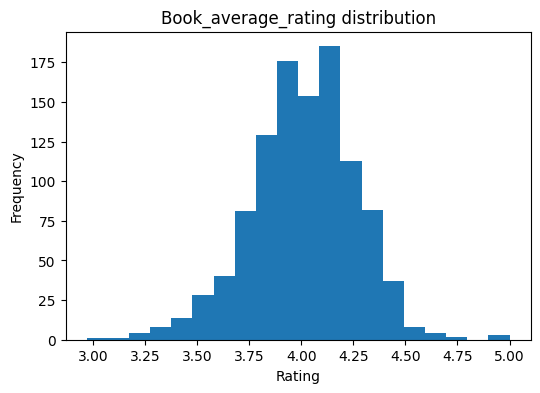

In [ ]:
#'book_average_rating' distribution
plt.figure(figsize=(6, 4))
cleaned['book_average_rating'].hist(bins=20)
plt.title('Book_average_rating distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


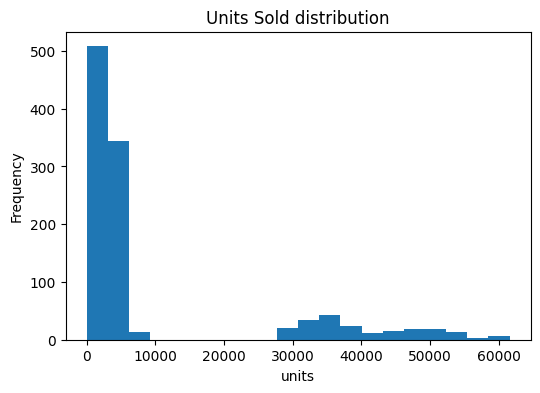

In [ ]:
# 2. 'units_sold' distribution
plt.figure(figsize=(6, 4))
cleaned['units_sold'].hist(bins=20)
plt.title('Units Sold distribution')
plt.xlabel('units')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

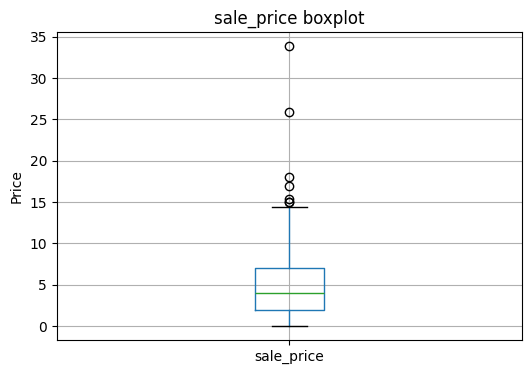

In [ ]:
# 3. 'sale_price' box plot
plt.figure(figsize=(6, 4))
cleaned.boxplot(column='sale_price')
plt.title('sale_price boxplot')
plt.ylabel('Price')
plt.grid(True)
plt.show()
